# import

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re


# read data file

In [2]:
#Read the updated files from DataWrangling
dff = pd.read_csv("foreda.csv")
print(dff.shape)
dff.head()

(404161, 36)


,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,constraint,...,cluster,event,failed,rr_cpu,rr_memory,au_cpu,au_memory,rsu_cpu,mu_cpu,mu_memory
0,0,2,94591244395,3,1,200,0,144,168846390496,[],...,7,FAIL,1,0.020660,0.014435,0.004662,5.920410e-03,0.004349,0.011902,5.935669e-03
1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,[],...,7,FAIL,1,0.007240,0.001303,0.000000,9.536743e-07,0.000000,0.000000,9.536743e-07
2,195684022913,6,276227177776,2,0,103,0,376,169321752432,[],...,7,SCHEDULE,0,0.048584,0.004166,0.024200,2.788544e-03,0.026459,0.060059,2.845764e-03
3,0,2,10507389885,3,0,200,0,1977,178294817221,[],...,8,FAIL,1,0.070435,0.041626,0.047607,3.442383e-02,0.050842,0.133301,3.466797e-02
4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,[],...,2,FINISH,0,0.002449,0.000232,0.000271,7.629395e-05,0.000341,0.000415,7.629395e-05


# basic info on data

In [3]:
#understanding the basic data structure

dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404161 entries, 0 to 404160
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time                             404161 non-null  int64  
 1   instance_events_type             404161 non-null  int64  
 2   collection_id                    404161 non-null  int64  
 3   scheduling_class                 404161 non-null  int64  
 4   collection_type                  404161 non-null  int64  
 5   priority                         404161 non-null  int64  
 6   alloc_collection_id              404161 non-null  int64  
 7   instance_index                   404161 non-null  int64  
 8   machine_id                       404161 non-null  int64  
 9   constraint                       404161 non-null  object 
 10  collections_events_type          404161 non-null  int64  
 11  user                             404161 non-null  object 
 12  co

In [4]:
# Display summary statistics
dff.describe()

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,collections_events_type,...,sample_rate,cluster,failed,rr_cpu,rr_memory,au_cpu,au_memory,rsu_cpu,mu_cpu,mu_memory
count,4.041610e+05,404161.000000,4.041610e+05,404161.000000,404161.000000,404161.000000,4.041610e+05,404161.000000,4.041610e+05,404161.000000,...,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,399410.000000
mean,6.956895e+13,2.951406,3.602529e+11,1.262108,0.086292,148.119027,7.051785e+10,5044.437007,8.496428e+10,2.951406,...,0.999221,4.559923,0.227709,0.015366,0.009061,0.007448,0.005640,0.007193,0.025383,0.005950
std,2.512882e+16,2.046956,2.443740e+11,1.012936,0.280796,116.625033,1.676425e+11,11872.019566,1.378538e+11,2.046956,...,0.010260,2.209991,0.419354,0.028673,0.022322,0.018579,0.016567,0.019315,0.052739,0.016644
min,0.000000e+00,0.000000,6.824000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.000000e+00,0.000000,...,0.110000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.713251e+11,2.000000,2.125496e+11,0.000000,0.000000,103.000000,0.000000e+00,400.000000,2.931973e+09,2.000000,...,1.000000,3.000000,0.000000,0.004051,0.001303,0.000200,0.000244,0.000167,0.000794,0.000279
50%,1.087516e+12,3.000000,3.122115e+11,1.000000,0.000000,105.000000,0.000000e+00,1375.000000,2.009009e+10,3.000000,...,1.000000,5.000000,0.000000,0.008102,0.003254,0.001036,0.001282,0.000701,0.005005,0.001444
75%,1.766915e+12,5.000000,4.928309e+11,2.000000,0.000000,200.000000,0.000000e+00,4200.000000,1.328371e+11,5.000000,...,1.000000,6.000000,0.000000,0.015930,0.006508,0.007317,0.004257,0.007172,0.029846,0.004782
max,9.223372e+18,10.000000,8.258532e+11,3.000000,1.000000,450.000000,7.426667e+11,177107.000000,8.254274e+11,10.000000,...,1.000000,8.000000,1.000000,0.583008,0.286621,0.538086,0.223877,0.644531,1.271484,0.224365


In [5]:
# Check for any remaining missing values
missing_values = dff.isnull().sum()
print(missing_values[missing_values > 0])

cycles_per_instruction             123284
memory_accesses_per_instruction    123284
mu_memory                            4751
dtype: int64


# Data Visualization and Exploration

In [6]:
#change failed data type to object

dff['failed'] = dff['failed'].astype('string')

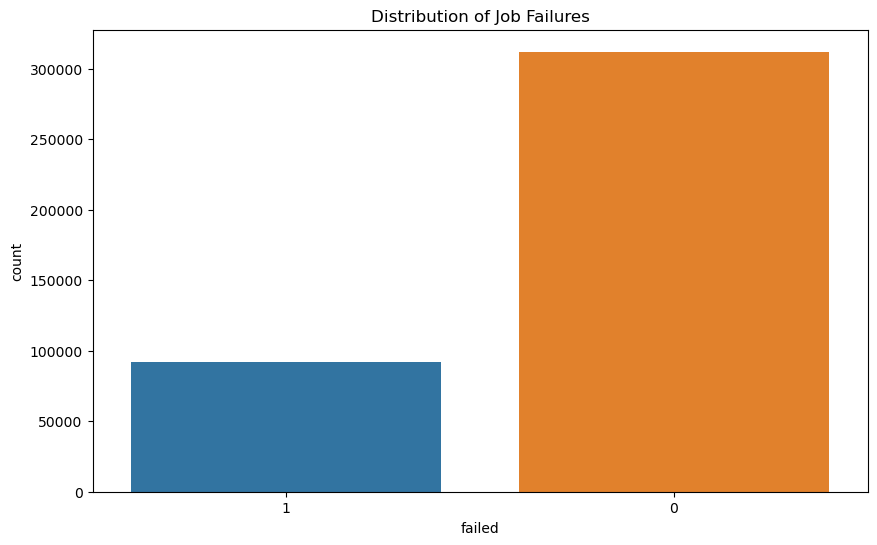

In [7]:
# Distribution of job failures
plt.figure(figsize=(10, 6))
sns.countplot(x='failed', data=dff)
plt.title('Distribution of Job Failures')
plt.show()

In [8]:
dff.head()

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,constraint,...,cluster,event,failed,rr_cpu,rr_memory,au_cpu,au_memory,rsu_cpu,mu_cpu,mu_memory
0,0,2,94591244395,3,1,200,0,144,168846390496,[],...,7,FAIL,1,0.020660,0.014435,0.004662,5.920410e-03,0.004349,0.011902,5.935669e-03
1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,[],...,7,FAIL,1,0.007240,0.001303,0.000000,9.536743e-07,0.000000,0.000000,9.536743e-07
2,195684022913,6,276227177776,2,0,103,0,376,169321752432,[],...,7,SCHEDULE,0,0.048584,0.004166,0.024200,2.788544e-03,0.026459,0.060059,2.845764e-03
3,0,2,10507389885,3,0,200,0,1977,178294817221,[],...,8,FAIL,1,0.070435,0.041626,0.047607,3.442383e-02,0.050842,0.133301,3.466797e-02
4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,[],...,2,FINISH,0,0.002449,0.000232,0.000271,7.629395e-05,0.000341,0.000415,7.629395e-05


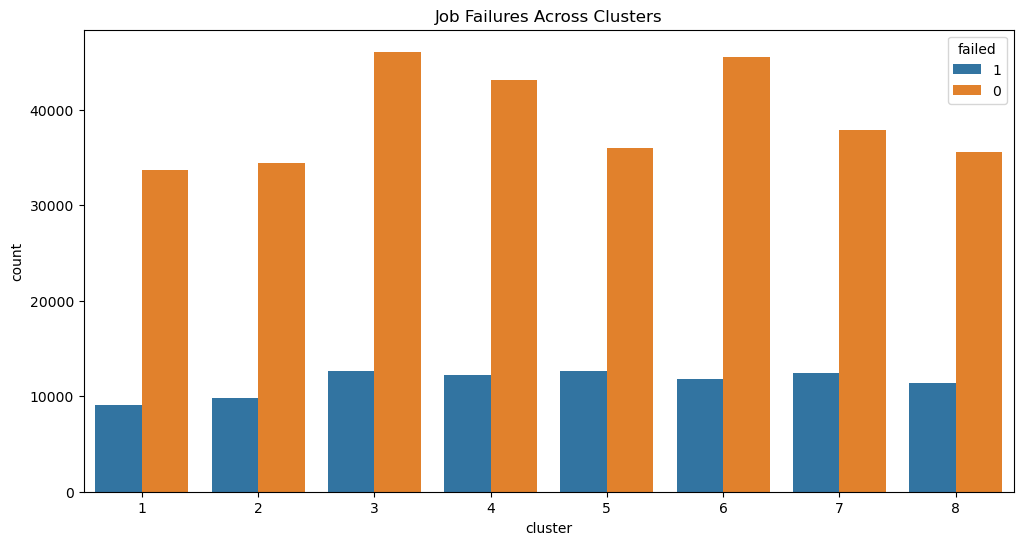

In [9]:
# Job failures across different clusters
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', hue='failed', data=dff)
plt.title('Job Failures Across Clusters')
plt.show()

In [10]:
#change failed data type to int

dff['failed'] = dff['failed'].astype('int')

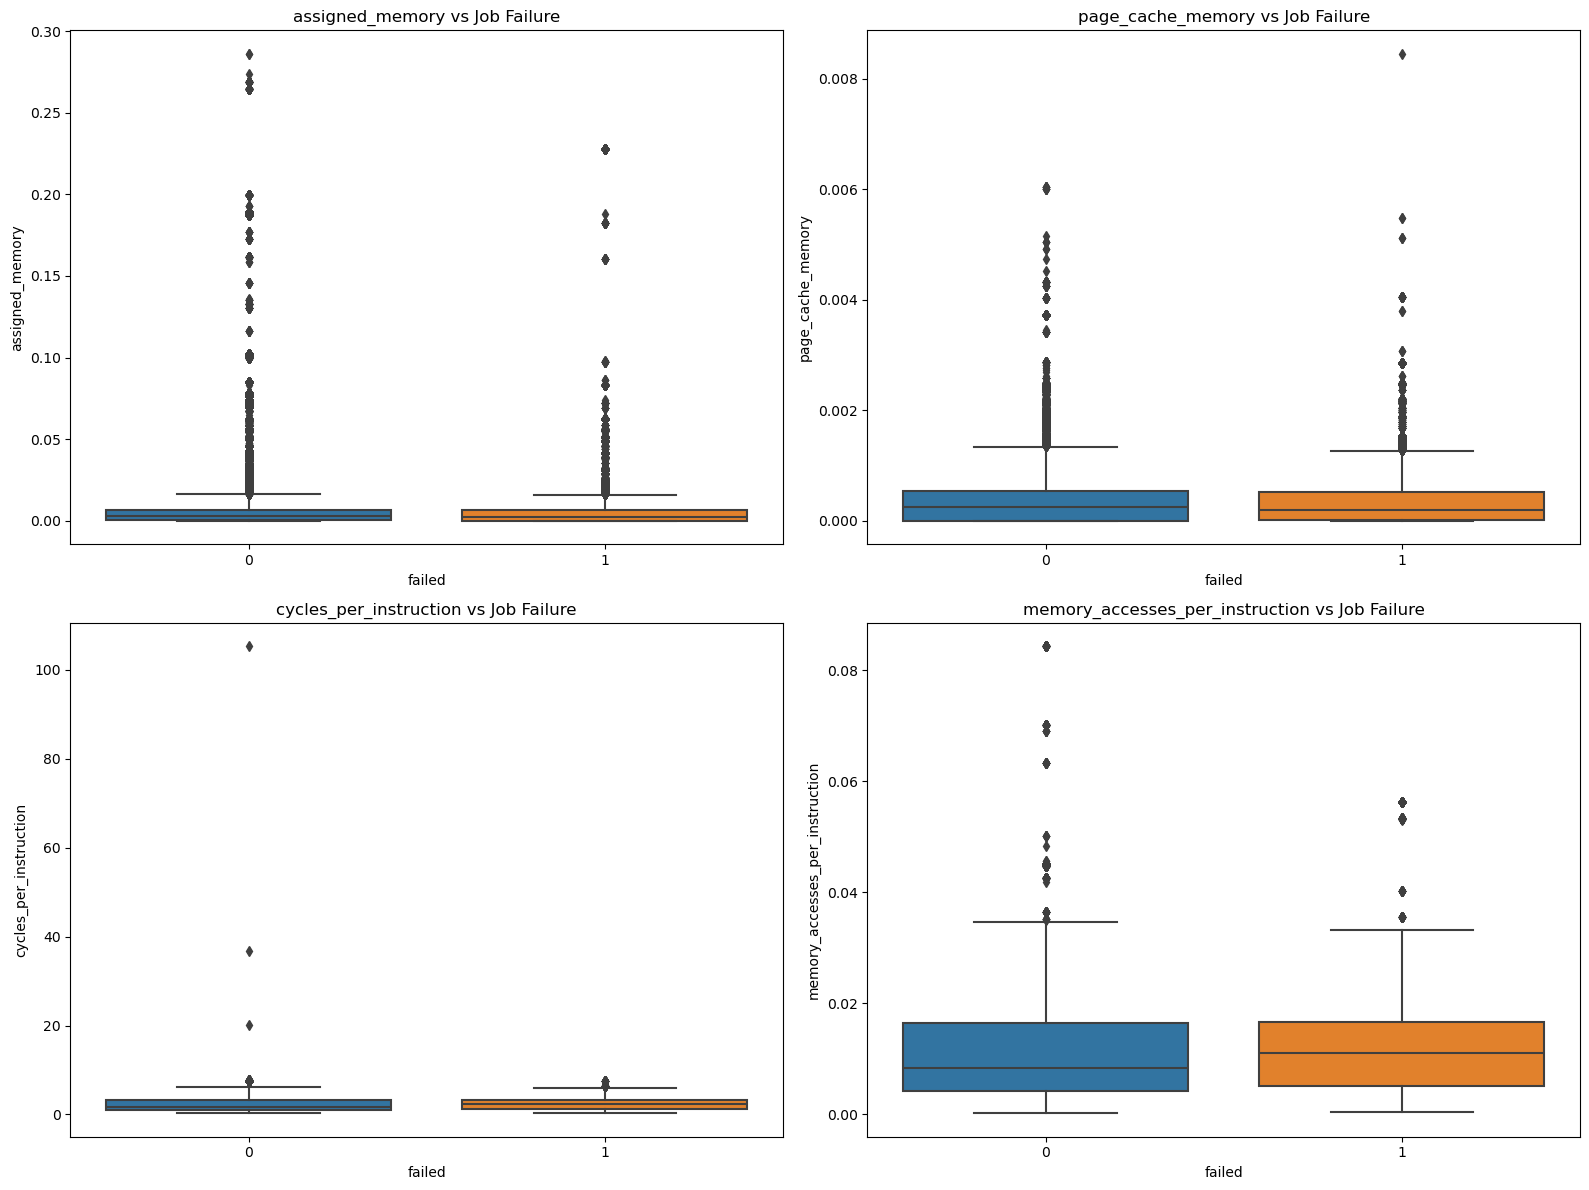

In [11]:
# Resource usage analysis
resource_cols = ['assigned_memory', 'page_cache_memory', 'cycles_per_instruction', 'memory_accesses_per_instruction']


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for i, col in enumerate(resource_cols):
    sns.boxplot(x='failed', y=col, data=dff, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} vs Job Failure')
plt.tight_layout()
plt.show()

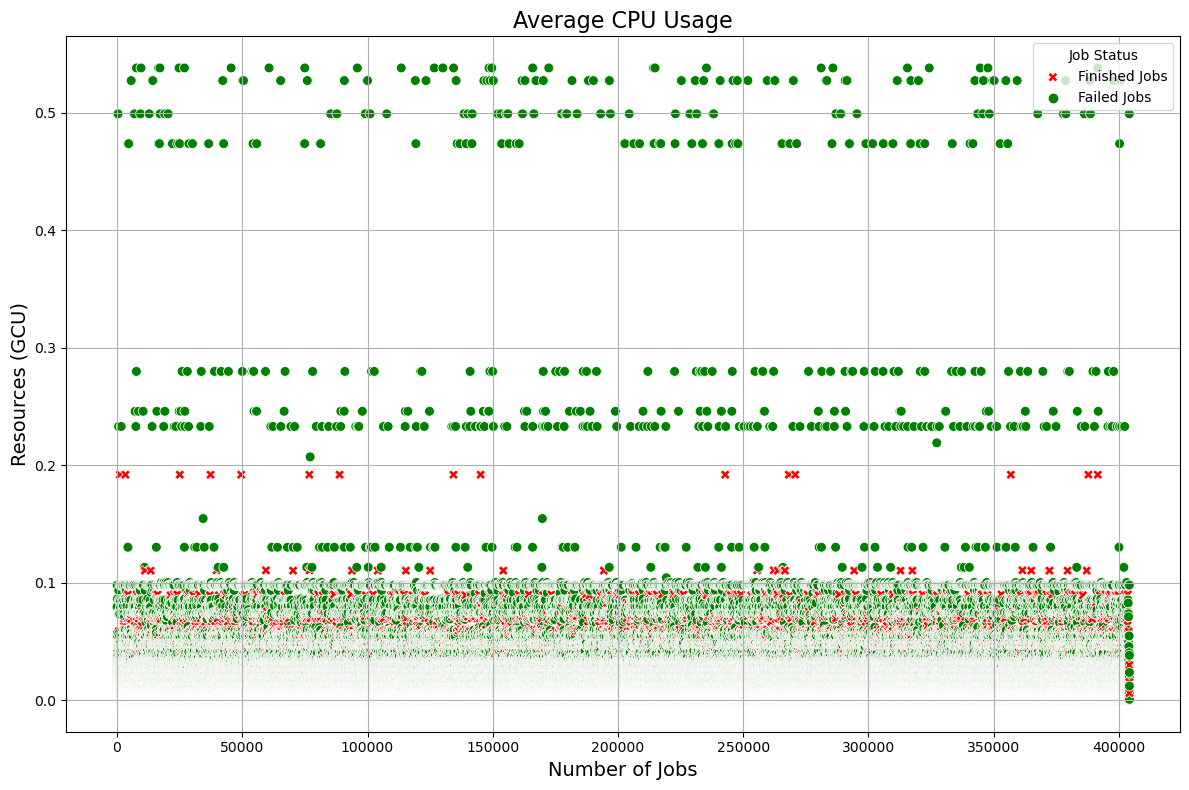

In [12]:
plt.figure(figsize=(12, 8))

# Plot with adjusted marker size and better layout
sns.scatterplot(x=dff.index, y='au_cpu', hue='failed', 
                style='failed', markers={0: 'o', 1: 'X'}, 
                palette={0: 'green', 1: 'red'}, 
                s=50,  # Adjust marker size
                data=dff)

plt.title('Average CPU Usage', fontsize=16)
plt.xlabel('Number of Jobs', fontsize=14)
plt.ylabel('Resources (GCU)', fontsize=14)
plt.legend(title='Job Status', labels=['Finished Jobs', 'Failed Jobs'], loc='upper right')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()

# Feature Analysis

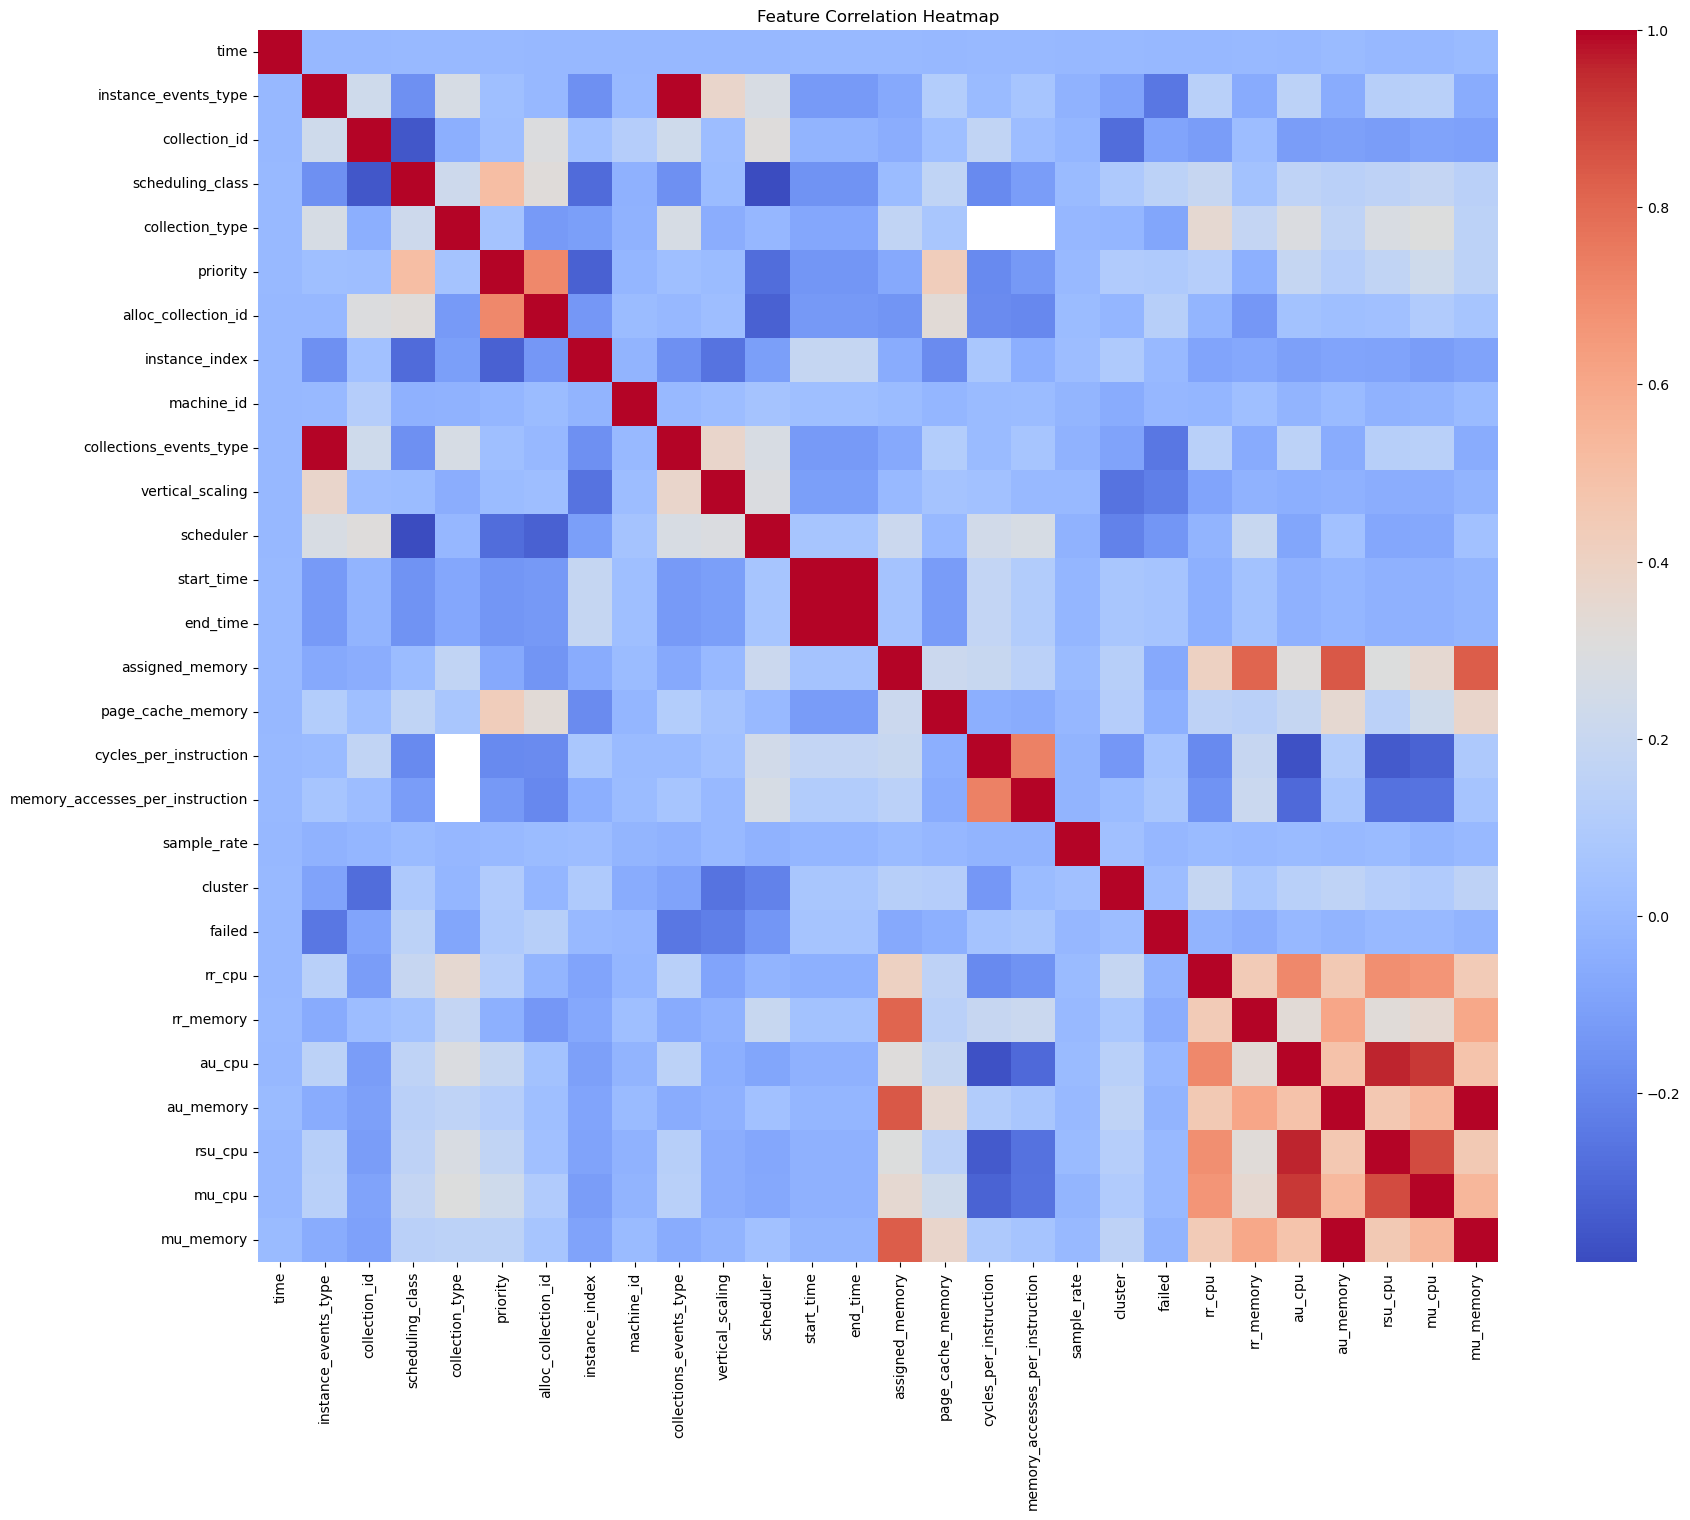

In [13]:
# Correlation analysis for numerical features
numerical_features = dff.select_dtypes(include=[np.number]).columns
correlation_matrix = dff[numerical_features].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
failed_correlations = correlation_matrix['failed'].sort_values(key=abs, ascending=False)
print("Top correlations with 'failed':")
print(failed_correlations.head(10))

Top correlations with 'failed':
failed                     1.000000
instance_events_type      -0.252381
collections_events_type   -0.252381
vertical_scaling          -0.224161
scheduling_class           0.150793
scheduler                 -0.143192
alloc_collection_id        0.125892
priority                   0.094107
collection_id             -0.086644
collection_type           -0.083431
Name: failed, dtype: float64


## Job Duration Analysis

Average duration for finished jobs: 202045090.18678114
Average duration for failed jobs: 245418206.90854168


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


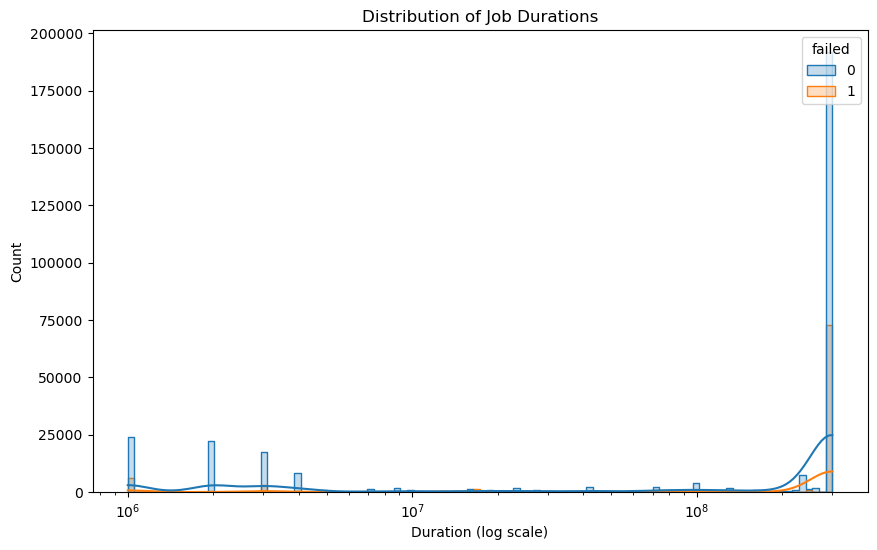

Percentage of failed jobs running longer than average: 80.08%


In [15]:
# Calculate job duration
dff['duration'] = dff['end_time'] - dff['start_time']

# Calculate average duration for each job status
avg_duration = dff.groupby('failed')['duration'].mean()
print("Average duration for finished jobs:", avg_duration[0])
print("Average duration for failed jobs:", avg_duration[1])

# Plot distribution of job durations
plt.figure(figsize=(10, 6))
sns.histplot(data=dff, x='duration', hue='failed', kde=True, element='step', log_scale=True)
plt.title('Distribution of Job Durations')
plt.xlabel('Duration (log scale)')
plt.show()

# Determine percentage of failed jobs that run longer than average
overall_avg_duration = dff['duration'].mean()
long_running_failed = dff[(dff['failed'] == 1) & (dff['duration'] > overall_avg_duration)]
pct_long_running = len(long_running_failed) / len(dff[dff['failed'] == 1]) * 100
print(f"Percentage of failed jobs running longer than average: {pct_long_running:.2f}%")

## User and Collection Analysis

In [17]:
# Group failed jobs by collection and user
failed_jobs = dff[dff['failed'] == 1]
collection_failures = failed_jobs.groupby('collection_id').size().sort_values(ascending=False)
user_failures = failed_jobs.groupby('user').size().sort_values(ascending=False)

# Calculate percentage of failed jobs belonging to top collections
top_collections = collection_failures.head(10)
pct_top_collections = top_collections.sum() / len(failed_jobs) * 100
print(f"Percentage of failed jobs in top 10 collections: {pct_top_collections:.2f}%")

# Identify users submitting highest percentage of failed jobs
top_users = user_failures.head(10)
pct_top_users = top_users.sum() / len(failed_jobs) * 100
print(f"Percentage of failed jobs submitted by top 10 users: {pct_top_users:.2f}%")

# Analyze characteristics of collections with most failed jobs
top_collection_id = collection_failures.index[0]
top_collection_jobs = dff[dff['collection_id'] == top_collection_id]


Percentage of failed jobs in top 10 collections: 18.02%
Percentage of failed jobs submitted by top 10 users: 66.02%


# Statistical Tests

In [18]:
# T-test for numerical features
numerical_cols = ['assigned_memory', 'page_cache_memory', 'cycles_per_instruction', 'memory_accesses_per_instruction', 'rr_cpu', 'rr_memory', 'au_cpu', 'au_memory', 'rsu_cpu', 'mu_cpu', 'mu_memory']
for col in numerical_cols:
    failed_data = dff[dff['failed'] == 1][col].dropna()
    success_data = dff[dff['failed'] == 0][col].dropna()
    t_stat, p_value = stats.ttest_ind(failed_data, success_data)
    print(f"T-test for {col}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

categorical_cols = ['scheduling_class', 'collection_type', 'event']
for col in categorical_cols:
    contingency_table = pd.crosstab(dff[col], dff['failed'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}: chi2 = {chi2:.4f}, p-value = {p_value:.4f}")

T-test for assigned_memory: t-statistic = -41.2438, p-value = 0.0000
T-test for page_cache_memory: t-statistic = -26.0499, p-value = 0.0000
T-test for cycles_per_instruction: t-statistic = 26.9720, p-value = 0.0000
T-test for memory_accesses_per_instruction: t-statistic = 37.5259, p-value = 0.0000
T-test for rr_cpu: t-statistic = -14.2855, p-value = 0.0000
T-test for rr_memory: t-statistic = -33.0603, p-value = 0.0000
T-test for au_cpu: t-statistic = -0.3816, p-value = 0.7028
T-test for au_memory: t-statistic = -14.4296, p-value = 0.0000
T-test for rsu_cpu: t-statistic = 1.0111, p-value = 0.3120
T-test for mu_cpu: t-statistic = 1.9500, p-value = 0.0512
T-test for mu_memory: t-statistic = -14.5620, p-value = 0.0000
Chi-square test for scheduling_class: chi2 = 10476.1327, p-value = 0.0000
Chi-square test for collection_type: chi2 = 2812.5594, p-value = 0.0000
Chi-square test for event: chi2 = 404161.0000, p-value = 0.0000


# Conclusion and next steps

Analysis of Results:


Resource Usage:

There are noticeable differences in resource usage patterns between failed and successful jobs, particularly in assigned memory and page cache memory.


Correlations:

The strongest correlations with job failure are:

instance_events_type (-0.252)
collections_events_type (-0.252)
vertical_scaling (-0.224)
scheduling_class (0.151)


These features might be good predictors for job failure.


Statistical Tests:

T-tests show significant differences (p < 0.05) between failed and successful jobs for most numerical features, except 'au_cpu', 'rsu_cpu', and 'mu_cpu'.
Chi-square tests indicate strong associations between categorical features (scheduling_class, collection_type, event) and job failure.



Conclusions:

Job failures are not evenly distributed across clusters, suggesting that cluster-specific factors may influence failure rates.
80.08% percentage of failed jobs are running longer than average; 18.02% percentage of failed jobs are in top 10 collections; and 66.02% percentage of failed jobs are submitted by top 10 users, indicating that failed jobs are concentrated in the top users and top events.
Resource usage patterns differ between failed and successful jobs, particularly in memory allocation and usage.
Certain event types and scheduling characteristics are more strongly associated with job failures.
The dataset is imbalanced, which will need to be addressed in the modeling phase.